<a href="https://colab.research.google.com/github/sa06840/FaceCoveringDetection/blob/main/courseworkCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Coursework: Face Covering Detection

- **Name:** Sajeel Nadeem Alam
- **ID:** 240045404



# Google Colab Setup

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/ComputerVision/Coursework/CW_Folder_PG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Code', 'test_function.ipynb', 'Models', 'CW_Dataset', 'Personal_Video']


Getting data from drive - Lab06

In [ ]:
# Identify path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/CV2024_CW_Dataset.zip')

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CV2024_CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CV2024_CW_Dataset.zip

replace __MACOSX/._CV2024_CW_Dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/._test? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/._train? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/test/._images? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/test/._labels? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/train/._images? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/train/._labels? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace CV2024_CW_Dataset/test/images/image_2711.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/test/images/._image_2711.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace CV2024_CW_Dataset/test/images/image_2654.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace __MACOSX/CV2024_CW_Dataset/test/images/._image_2654.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace CV202

# Importing Essential Libraries

In [ ]:
import os
from skimage import io
import matplotlib.pyplot as plt

# Reading Data

In [ ]:
dataset_path = "./CV2024_CW_Dataset"

for root, dirs, files in os.walk(dataset_path):
    print(root, "contains", len(files), "files")

./CV2024_CW_Dataset contains 0 files
./CV2024_CW_Dataset/test contains 0 files
./CV2024_CW_Dataset/test/images contains 458 files
./CV2024_CW_Dataset/test/labels contains 458 files
./CV2024_CW_Dataset/train contains 0 files
./CV2024_CW_Dataset/train/images contains 2394 files
./CV2024_CW_Dataset/train/labels contains 2394 files


In [ ]:
def import_selected_data(images_path, labels_path):  # Lab06
    images = []
    labels = []

    filenames = [file for file in sorted(os.listdir(images_path)) if file.endswith('.jpeg')]

    for file in filenames:
        img_path = os.path.join(images_path, file)
        img = io.imread(img_path)
        images.append(img)

        label_filename = os.path.splitext(file)[0] + ".txt"
        label_path = os.path.join(labels_path, label_filename)

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                label = f.read().strip()
        else:
            label = None

        labels.append(label)

    return images, labels

In [ ]:
trainImagesPath = "CV2024_CW_Dataset/train/images"
trainLabelsPath = "CV2024_CW_Dataset/train/labels"
testImagesPath = "CV2024_CW_Dataset/test/images"
testLabelsPath = "CV2024_CW_Dataset/test/labels"

trainImages, trainLabels = import_selected_data(trainImagesPath, trainLabelsPath)
testImages, testLabels = import_selected_data(testImagesPath, testLabelsPath)

print(f"Loaded {len(trainImages)} training images and {len(trainLabels)} labels")
print(f"Loaded {len(testImages)} testing images and {len(testLabels)} labels")

Loaded 2394 training images and 2394 labels
Loaded 458 testing images and 458 labels


Displaying Sample Image

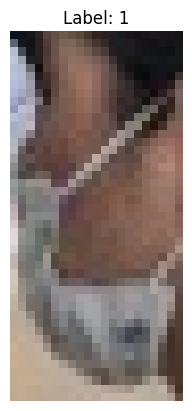

In [ ]:
sample_image = trainImages[-1]
sample_label = trainLabels[-1]

plt.imshow(sample_image)
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()